# Business Problem:

Determining the driving factors behind their employees attrition is the main idea
1. Lack of data driven approach currently is hurting them
2. Retention decisions were more reactive than proactive

# Project Objective: 

Providing client strategies to retain more employees backed by insights based on data provided.

In [800]:
# Importing libraries

import numpy as np
import pandas as pd
import datetime as dt

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF Selection
from patsy import dmatrices # Dependency for VIF


# Data Importing & Preperation 

Task-1: Data Importing& Preparation (Weightage: 15%):

1. Import all datasets in python  (0 Marks)
2. Join the different datasets into one master analysis file   (5 Marks)
3. Check for duplicates , column data type consistency, nulls, outliers & other anomalies and if found apply treatment   (5 Marks)
4. Apply any variable transformations, calculation that you deem necessary after looking at the data  (5 Marks)

In [801]:
# 1. Import all datasets in python  (0 Marks)

file_location = "C://Projects_python//Project_basicpython//Case Study//PRP//Project_Data_PythonPRP//"

file_name = "Project_Data_PythonPRP.xlsx"
data_dict = pd.read_excel(file_location+file_name, sheet_name="Data_Dictionary")
emp_data = pd.read_excel(file_location+file_name, sheet_name="Employee_Data")
emp_survey = pd.read_excel(file_location+file_name, sheet_name="Employee_Survey_Data")
manager_survey = pd.read_excel(file_location+file_name, sheet_name="Manager_Survey_Data")
in_time = pd.read_excel(file_location+file_name, sheet_name="In_Time")
out_time = pd.read_excel(file_location+file_name, sheet_name="Out_Time")


In [802]:
data_dict.head()

,Employee_Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Employee_Survey_Data,Unnamed: 5,Unnamed: 6,Unnamed: 7,In_Time,Unnamed: 9,Unnamed: 10
0,Variable,Meaning,Levels,NaN,Variable,Meaning,Levels,NaN,Variable,Meaning,Levels
1,EmployeeID,Employee number/id,NaN,NaN,EmployeeID,Employee number/id,NaN,NaN,EmployeeID,Employee number/id,NaN
2,Age,Age of the employee,NaN,NaN,EnvironmentSatisfaction,Work Environment Satisfaction Level,1 'Low',NaN,Each Date column,Employee - Office Log In Time,NaN
3,Attrition_Date,The date at which the employee was attrited fr...,NaN,NaN,NaN,NaN,2 'Medium',NaN,"Note: If any cell is having NA means, the empl...",NaN,NaN
4,BusinessTravel,How frequently the employees travelled for bus...,NaN,NaN,NaN,NaN,3 'High',NaN,NaN,NaN,NaN


In [803]:
emp_data.head()

,EmployeeID,Age,Attrition_Date,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BreaksTakenPerDay
0,1,51,NaN,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,Y,11,8,0,1.0,6,1,0,0,1.0
1,2,31,12/13/2015,Travel_Frequently,R&D,10,1,Life Sciences,Female,1,...,Y,23,8,1,6.0,3,5,1,4,2.0
2,3,32,NaN,Travel_Frequently,R&D,17,4,Other,Male,4,...,Y,15,8,3,5.0,2,5,0,3,3.0
3,4,38,NaN,Non-Travel,R&D,2,5,Life Sciences,Male,3,...,Y,11,8,3,13.0,5,8,7,5,2.0
4,5,32,NaN,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,Y,12,8,2,9.0,2,6,0,4,3.0


In [804]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [805]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [806]:
in_time.head()

,EmployeeID,2015-02-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-12-01 00:00:00,1/13/2015,1/15/2015,...,12/17/2015,12/18/2015,12/21/2015,12/22/2015,12/23/2015,12/24/2015,12/28/2015,12/29/2015,12/30/2015,12/31/2015
0,1,2015-02-01 09:43:00,2015-05-01 10:08:00,2015-06-01 09:54:00,2015-07-01 09:34:00,2015-08-01 09:51:00,2015-09-01 10:09:00,2015-12-01 09:42:00,1/13/2015 10:13,1/15/2015 10:01,...,NaN,NaN,12/21/2015 9:55,12/22/2015 10:04,12/23/2015 10:14,12/24/2015 10:11,12/28/2015 10:13,12/29/2015 10:03,12/30/2015 9:54,12/31/2015 10:12
1,2,2015-02-01 10:15:00,2015-05-01 10:21:00,NaT,2015-07-01 09:45:00,2015-08-01 10:09:00,2015-09-01 09:43:00,2015-12-01 10:00:00,1/13/2015 10:43,1/15/2015 9:37,...,12/17/2015 9:15,12/18/2015 10:37,12/21/2015 9:49,12/22/2015 10:33,12/23/2015 10:12,NaN,12/28/2015 9:31,12/29/2015 9:55,12/30/2015 10:32,12/31/2015 9:27
2,3,2015-02-01 10:17:00,2015-05-01 09:50:00,2015-06-01 10:14:00,2015-07-01 09:47:00,2015-08-01 10:03:00,2015-09-01 10:05:00,2015-12-01 10:03:00,1/13/2015 10:21,1/15/2015 9:55,...,12/17/2015 9:53,12/18/2015 10:15,12/21/2015 10:10,12/22/2015 9:44,12/23/2015 10:15,12/24/2015 10:07,12/28/2015 9:42,12/29/2015 9:43,12/30/2015 9:34,12/31/2015 10:28
3,4,2015-02-01 10:05:00,2015-05-01 09:56:00,2015-06-01 10:11:00,2015-07-01 09:37:00,2015-08-01 10:02:00,2015-09-01 10:08:00,2015-12-01 10:13:00,1/13/2015 9:53,1/15/2015 10:00,...,12/17/2015 9:54,12/18/2015 10:17,12/21/2015 9:58,12/22/2015 10:04,12/23/2015 10:11,12/24/2015 9:43,12/28/2015 9:52,12/29/2015 9:33,12/30/2015 10:18,12/31/2015 10:01
4,5,2015-02-01 10:28:00,2015-05-01 09:49:00,2015-06-01 09:45:00,2015-07-01 09:49:00,2015-08-01 10:19:00,2015-09-01 10:00:00,2015-12-01 10:29:00,1/13/2015 9:59,1/15/2015 10:06,...,12/17/2015 9:46,12/18/2015 9:58,12/21/2015 10:03,12/22/2015 10:10,12/23/2015 10:13,12/24/2015 9:44,12/28/2015 10:05,12/29/2015 10:30,12/30/2015 9:18,12/31/2015 9:41


In [807]:
out_time.head()

,EmployeeID,2015-02-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-12-01 00:00:00,1/13/2015,1/15/2015,...,12/17/2015,12/18/2015,12/21/2015,12/22/2015,12/23/2015,12/24/2015,12/28/2015,12/29/2015,12/30/2015,12/31/2015
0,1,2015-02-01 16:56:00,2015-05-01 17:20:00,2015-06-01 17:19:00,2015-07-01 16:34:00,2015-08-01 17:08:00,2015-09-01 17:38:00,2015-12-01 16:58:00,1/13/2015 18:02,1/15/2015 17:22,...,NaN,NaN,12/21/2015 17:15,12/22/2015 17:27,12/23/2015 16:44,12/24/2015 17:47,12/28/2015 18:00,12/29/2015 17:22,12/30/2015 17:40,12/31/2015 17:17
1,2,2015-02-01 18:22:00,2015-05-01 17:48:00,NaT,2015-07-01 17:09:00,2015-08-01 17:34:00,2015-09-01 16:52:00,2015-12-01 17:36:00,1/13/2015 18:00,1/15/2015 17:14,...,12/17/2015 17:10,12/18/2015 18:31,12/21/2015 17:34,12/22/2015 18:16,12/23/2015 17:38,NaN,12/28/2015 17:08,12/29/2015 17:54,12/30/2015 18:31,12/31/2015 17:40
2,3,2015-02-01 16:59:00,2015-05-01 17:06:00,2015-06-01 16:38:00,2015-07-01 16:33:00,2015-08-01 17:24:00,2015-09-01 16:57:00,2015-12-01 17:28:00,1/13/2015 17:21,1/15/2015 17:21,...,12/17/2015 17:06,12/18/2015 17:02,12/21/2015 17:20,12/22/2015 16:32,12/23/2015 16:59,12/24/2015 16:58,12/28/2015 16:43,12/29/2015 17:09,12/30/2015 17:06,12/31/2015 17:15
3,4,2015-02-01 17:25:00,2015-05-01 17:14:00,2015-06-01 17:07:00,2015-07-01 16:32:00,2015-08-01 16:53:00,2015-09-01 17:19:00,2015-12-01 17:13:00,1/13/2015 17:11,1/15/2015 16:53,...,12/17/2015 17:21,12/18/2015 17:55,12/21/2015 16:49,12/22/2015 17:24,12/23/2015 17:36,12/24/2015 16:48,12/28/2015 17:19,12/29/2015 16:58,12/30/2015 17:40,12/31/2015 17:09
4,5,2015-02-01 18:31:00,2015-05-01 17:49:00,2015-06-01 17:26:00,2015-07-01 17:37:00,2015-08-01 17:59:00,2015-09-01 17:44:00,2015-12-01 18:51:00,1/13/2015 18:14,1/15/2015 18:21,...,12/17/2015 18:05,12/18/2015 17:52,12/21/2015 17:43,12/22/2015 18:07,12/23/2015 18:00,12/24/2015 17:59,12/28/2015 17:44,12/29/2015 18:47,12/30/2015 17:15,12/31/2015 17:42


In [808]:
# 2. Join the different datasets into one master analysis file   (5 Marks)

In [809]:
# It appears that EmployeeID is the primary key for all the tables

In [810]:
# Merging all the tables

df = emp_data.merge(emp_survey, on= 'EmployeeID', how= 'left')
df = df.merge(manager_survey, on= 'EmployeeID', how= 'left')
df = df.merge(in_time, on= 'EmployeeID', how= 'left')
df = df.merge(out_time, on= 'EmployeeID', how= 'left')


In [811]:
df.head()

,EmployeeID,Age,Attrition_Date,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,12/17/2015_y,12/18/2015_y,12/21/2015_y,12/22/2015_y,12/23/2015_y,12/24/2015_y,12/28/2015_y,12/29/2015_y,12/30/2015_y,12/31/2015_y
0,1,51,NaN,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,NaN,NaN,12/21/2015 17:15,12/22/2015 17:27,12/23/2015 16:44,12/24/2015 17:47,12/28/2015 18:00,12/29/2015 17:22,12/30/2015 17:40,12/31/2015 17:17
1,2,31,12/13/2015,Travel_Frequently,R&D,10,1,Life Sciences,Female,1,...,12/17/2015 17:10,12/18/2015 18:31,12/21/2015 17:34,12/22/2015 18:16,12/23/2015 17:38,NaN,12/28/2015 17:08,12/29/2015 17:54,12/30/2015 18:31,12/31/2015 17:40
2,3,32,NaN,Travel_Frequently,R&D,17,4,Other,Male,4,...,12/17/2015 17:06,12/18/2015 17:02,12/21/2015 17:20,12/22/2015 16:32,12/23/2015 16:59,12/24/2015 16:58,12/28/2015 16:43,12/29/2015 17:09,12/30/2015 17:06,12/31/2015 17:15
3,4,38,NaN,Non-Travel,R&D,2,5,Life Sciences,Male,3,...,12/17/2015 17:21,12/18/2015 17:55,12/21/2015 16:49,12/22/2015 17:24,12/23/2015 17:36,12/24/2015 16:48,12/28/2015 17:19,12/29/2015 16:58,12/30/2015 17:40,12/31/2015 17:09
4,5,32,NaN,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,12/17/2015 18:05,12/18/2015 17:52,12/21/2015 17:43,12/22/2015 18:07,12/23/2015 18:00,12/24/2015 17:59,12/28/2015 17:44,12/29/2015 18:47,12/30/2015 17:15,12/31/2015 17:42


In [812]:
# we have merged all the tables and named the table as df

3. Check for duplicates , column data type consistency, nulls, outliers & other anomalies and if found apply treatment   (5 Marks)

In [813]:
# checking duplicates

df.duplicated().value_counts()

False    4424
True      103
dtype: int64

In [814]:
# so there are 103 rows which are duplicated. we will drop these entries

In [815]:
df = df.drop_duplicates()

In [816]:
df.head()

,EmployeeID,Age,Attrition_Date,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,12/17/2015_y,12/18/2015_y,12/21/2015_y,12/22/2015_y,12/23/2015_y,12/24/2015_y,12/28/2015_y,12/29/2015_y,12/30/2015_y,12/31/2015_y
0,1,51,NaN,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,NaN,NaN,12/21/2015 17:15,12/22/2015 17:27,12/23/2015 16:44,12/24/2015 17:47,12/28/2015 18:00,12/29/2015 17:22,12/30/2015 17:40,12/31/2015 17:17
1,2,31,12/13/2015,Travel_Frequently,R&D,10,1,Life Sciences,Female,1,...,12/17/2015 17:10,12/18/2015 18:31,12/21/2015 17:34,12/22/2015 18:16,12/23/2015 17:38,NaN,12/28/2015 17:08,12/29/2015 17:54,12/30/2015 18:31,12/31/2015 17:40
2,3,32,NaN,Travel_Frequently,R&D,17,4,Other,Male,4,...,12/17/2015 17:06,12/18/2015 17:02,12/21/2015 17:20,12/22/2015 16:32,12/23/2015 16:59,12/24/2015 16:58,12/28/2015 16:43,12/29/2015 17:09,12/30/2015 17:06,12/31/2015 17:15
3,4,38,NaN,Non-Travel,R&D,2,5,Life Sciences,Male,3,...,12/17/2015 17:21,12/18/2015 17:55,12/21/2015 16:49,12/22/2015 17:24,12/23/2015 17:36,12/24/2015 16:48,12/28/2015 17:19,12/29/2015 16:58,12/30/2015 17:40,12/31/2015 17:09
4,5,32,NaN,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,12/17/2015 18:05,12/18/2015 17:52,12/21/2015 17:43,12/22/2015 18:07,12/23/2015 18:00,12/24/2015 17:59,12/28/2015 17:44,12/29/2015 18:47,12/30/2015 17:15,12/31/2015 17:42


In [817]:
df.shape

(4424, 527)

In [818]:
df.dtypes

EmployeeID         int64
Age                int64
Attrition_Date    object
BusinessTravel    object
Department        object
                   ...  
12/24/2015_y      object
12/28/2015_y      object
12/29/2015_y      object
12/30/2015_y      object
12/31/2015_y      object
Length: 527, dtype: object

In [819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4526
Columns: 527 entries, EmployeeID to 12/31/2015_y
dtypes: datetime64[ns](192), float64(9), int64(12), object(314)
memory usage: 17.8+ MB


In [820]:
# there are too many rows so we will check it in the imported tables and then we will apply trans formation

In [821]:
emp_data.dtypes

EmployeeID                   int64
Age                          int64
Attrition_Date              object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
BreaksTakenPerDay          float64
dtype: object

In [822]:
# attrition date is object but this should be date format

In [823]:
emp_survey.dtypes

EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [824]:
# everything is fine in this data

In [825]:
manager_survey.dtypes

EmployeeID           int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object

In [826]:
in_time.dtypes

EmployeeID                      int64
2015-02-01 00:00:00    datetime64[ns]
2015-05-01 00:00:00    datetime64[ns]
2015-06-01 00:00:00    datetime64[ns]
2015-07-01 00:00:00    datetime64[ns]
                            ...      
12/24/2015                     object
12/28/2015                     object
12/29/2015                     object
12/30/2015                     object
12/31/2015                     object
Length: 250, dtype: object

In [827]:
# this sheet has many coulumns of dates but the datatype is object

In [828]:
out_time.dtypes

EmployeeID                      int64
2015-02-01 00:00:00    datetime64[ns]
2015-05-01 00:00:00    datetime64[ns]
2015-06-01 00:00:00    datetime64[ns]
2015-07-01 00:00:00    datetime64[ns]
                            ...      
12/24/2015                     object
12/28/2015                     object
12/29/2015                     object
12/30/2015                     object
12/31/2015                     object
Length: 250, dtype: object

In [829]:
# same is the case in outtime data
# we need to change this to datetime format.

In [830]:
# converting to the correct datatypes

df.Attrition_Date.dtypes

dtype('O')

In [831]:
pd.to_datetime(df.Attrition_Date)

0             NaT
1      2015-12-13
2             NaT
3             NaT
4             NaT
          ...    
4522          NaT
4523          NaT
4524          NaT
4525          NaT
4526          NaT
Name: Attrition_Date, Length: 4424, dtype: datetime64[ns]

In [832]:
df.Attrition_Date.head()

0           NaN
1    12/13/2015
2           NaN
3           NaN
4           NaN
Name: Attrition_Date, dtype: object

In [833]:
df.loc[:,'Attrition_Date'] = pd.to_datetime(df.Attrition_Date)

C:\Users\pauld\AppData\Local\Temp\ipykernel_12308\125609315.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Attrition_Date'] = pd.to_datetime(df.Attrition_Date)


In [834]:
df.Attrition_Date

0             NaT
1      2015-12-13
2             NaT
3             NaT
4             NaT
          ...    
4522          NaT
4523          NaT
4524          NaT
4525          NaT
4526          NaT
Name: Attrition_Date, Length: 4424, dtype: datetime64[ns]

In [835]:
# Datatype of Atrrition date column is now converted to datetime column

In [836]:
df.select_dtypes(include = 'object').head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,1/13/2015_x,1/15/2015_x,1/16/2015_x,...,12/17/2015_y,12/18/2015_y,12/21/2015_y,12/22/2015_y,12/23/2015_y,12/24/2015_y,12/28/2015_y,12/29/2015_y,12/30/2015_y,12/31/2015_y
0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y,1/13/2015 10:13,1/15/2015 10:01,1/16/2015 10:19,...,NaN,NaN,12/21/2015 17:15,12/22/2015 17:27,12/23/2015 16:44,12/24/2015 17:47,12/28/2015 18:00,12/29/2015 17:22,12/30/2015 17:40,12/31/2015 17:17
1,Travel_Frequently,R&D,Life Sciences,Female,Research Scientist,Single,Y,1/13/2015 10:43,1/15/2015 9:37,1/16/2015 9:57,...,12/17/2015 17:10,12/18/2015 18:31,12/21/2015 17:34,12/22/2015 18:16,12/23/2015 17:38,NaN,12/28/2015 17:08,12/29/2015 17:54,12/30/2015 18:31,12/31/2015 17:40
2,Travel_Frequently,R&D,Other,Male,Sales Executive,Married,Y,1/13/2015 10:21,1/15/2015 9:55,1/16/2015 10:05,...,12/17/2015 17:06,12/18/2015 17:02,12/21/2015 17:20,12/22/2015 16:32,12/23/2015 16:59,12/24/2015 16:58,12/28/2015 16:43,12/29/2015 17:09,12/30/2015 17:06,12/31/2015 17:15
3,Non-Travel,R&D,Life Sciences,Male,Human Resources,Married,Y,1/13/2015 9:53,1/15/2015 10:00,1/16/2015 9:58,...,12/17/2015 17:21,12/18/2015 17:55,12/21/2015 16:49,12/22/2015 17:24,12/23/2015 17:36,12/24/2015 16:48,12/28/2015 17:19,12/29/2015 16:58,12/30/2015 17:40,12/31/2015 17:09
4,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y,1/13/2015 9:59,1/15/2015 10:06,1/16/2015 10:03,...,12/17/2015 18:05,12/18/2015 17:52,12/21/2015 17:43,12/22/2015 18:07,12/23/2015 18:00,12/24/2015 17:59,12/28/2015 17:44,12/29/2015 18:47,12/30/2015 17:15,12/31/2015 17:42


In [837]:
col_names = df.columns.difference(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'Over18',
                      'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DistanceFromHome', 'Education', 'EmployeeID',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',  'Age', 'Attrition_Date',
       'BreaksTakenPerDay', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked'])

In [838]:
col_names

Index(['1/13/2015_x', '1/13/2015_y', '1/15/2015_x', '1/15/2015_y',
       '1/16/2015_x', '1/16/2015_y', '1/19/2015_x', '1/19/2015_y',
       '1/20/2015_x', '1/20/2015_y',
       ...
       '9/24/2015_x', '9/24/2015_y', '9/25/2015_x', '9/25/2015_y',
       '9/28/2015_x', '9/28/2015_y', '9/29/2015_x', '9/29/2015_y',
       '9/30/2015_x', '9/30/2015_y'],
      dtype='object', length=498)

In [839]:
# these are the columns for dates with object datatype im in_time and out_time columns

In [840]:
# changing the datatypes of these columns. if time is not defined the default time would be 00:00:00
for i in col_names:
    df[i] = pd.to_datetime(df[i])

In [841]:
df[col_names].dtypes

1/13/2015_x    datetime64[ns]
1/13/2015_y    datetime64[ns]
1/15/2015_x    datetime64[ns]
1/15/2015_y    datetime64[ns]
1/16/2015_x    datetime64[ns]
                    ...      
9/28/2015_y    datetime64[ns]
9/29/2015_x    datetime64[ns]
9/29/2015_y    datetime64[ns]
9/30/2015_x    datetime64[ns]
9/30/2015_y    datetime64[ns]
Length: 498, dtype: object

In [842]:
# the datatypes are now fine for EDA

In [843]:
# checking the null values

In [844]:
df[df.columns.difference(col_names)].isna().sum()

Age                           0
Attrition_Date             3712
BreaksTakenPerDay          3512
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
EnvironmentSatisfaction      27
Gender                        0
JobInvolvement                2
JobLevel                      0
JobRole                       0
JobSatisfaction              22
MaritalStatus                 0
MonthlyIncome                13
NumCompaniesWorked           19
Over18                        0
PercentSalaryHike             0
PerformanceRating             2
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears            16
TrainingTimesLastYear         0
WorkLifeBalance              43
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [845]:
df.shape

(4424, 527)

In [846]:
# for break taken per day 
# we are filling the values by the median values because this is the norm and no other value in the column is 0
df.BreaksTakenPerDay = df.BreaksTakenPerDay.fillna(df.BreaksTakenPerDay.median())

In [847]:
# environment satisfaction has null values so we will fill null with the median value 
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.fillna(df.EnvironmentSatisfaction.median())

In [848]:
df.JobSatisfaction = df.JobSatisfaction.fillna(df.JobSatisfaction.median())
df.NumCompaniesWorked = df.NumCompaniesWorked.fillna(df.NumCompaniesWorked.median())
df.PerformanceRating = df.PerformanceRating.fillna(df.PerformanceRating.median())
df.TotalWorkingYears = df.TotalWorkingYears.fillna(df.TotalWorkingYears.median())
df.WorkLifeBalance = df.WorkLifeBalance.fillna(df.WorkLifeBalance.median())
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df.JobInvolvement = df.JobInvolvement.fillna(df.JobInvolvement.median())

In [849]:
# Attrition date is null means employee has not left the organisation.
# the in_time and out_time dates being null means that employee is on leave

In [850]:
df[df.columns.difference(col_names)].isna().sum()

Age                           0
Attrition_Date             3712
BreaksTakenPerDay             0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
Over18                        0
PercentSalaryHike             0
PerformanceRating             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [851]:
df[df.columns.difference(col_names)].isna().sum()

Age                           0
Attrition_Date             3712
BreaksTakenPerDay             0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
Over18                        0
PercentSalaryHike             0
PerformanceRating             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [852]:
# all the null values are treated

In [853]:
# treating the coutliers

In [854]:
col_names= df[df.columns.difference(col_names)].columns

In [855]:
col_names

Index(['Age', 'Attrition_Date', 'BreaksTakenPerDay', 'BusinessTravel',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeID', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [856]:
df_num = df.select_dtypes(include= 'number')

In [857]:
df_num.head()

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BreaksTakenPerDay,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,6,2,1,131160.0,1.0,11,8,0,...,6,1,0,0,1.0,3.0,4.0,2.0,3.0,3.0
1,2,31,10,1,1,41890.0,0.0,23,8,1,...,3,5,1,4,2.0,3.0,2.0,4.0,2.0,4.0
2,3,32,17,4,4,193280.0,1.0,15,8,3,...,2,5,0,3,3.0,2.0,2.0,1.0,3.0,3.0
3,4,38,2,5,3,83210.0,3.0,11,8,3,...,5,8,7,5,2.0,4.0,4.0,3.0,2.0,3.0
4,5,32,10,1,1,23420.0,4.0,12,8,2,...,2,6,0,4,3.0,4.0,1.0,3.0,3.0,3.0


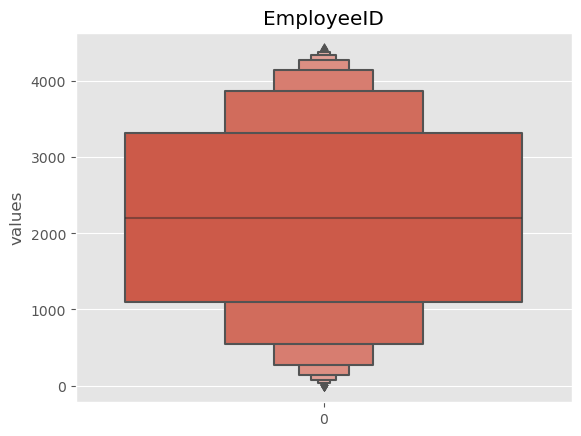

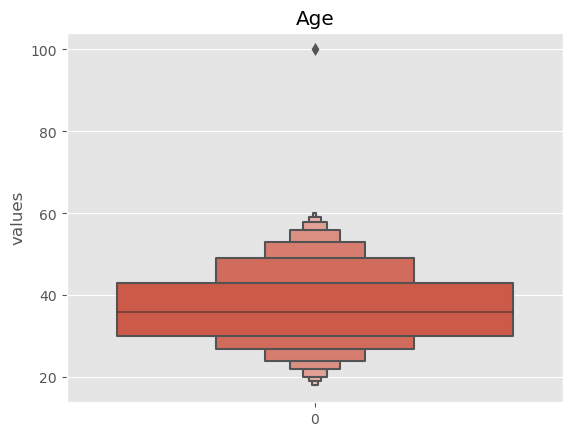

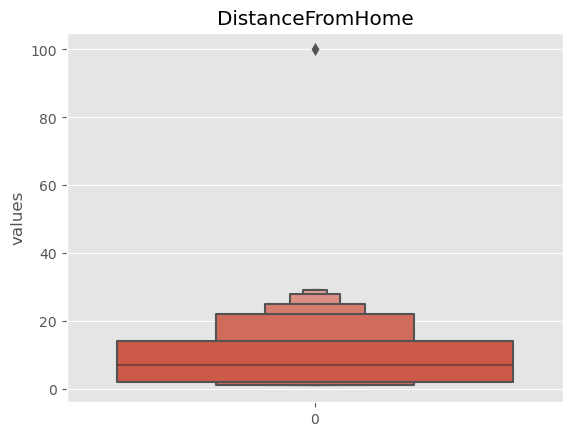

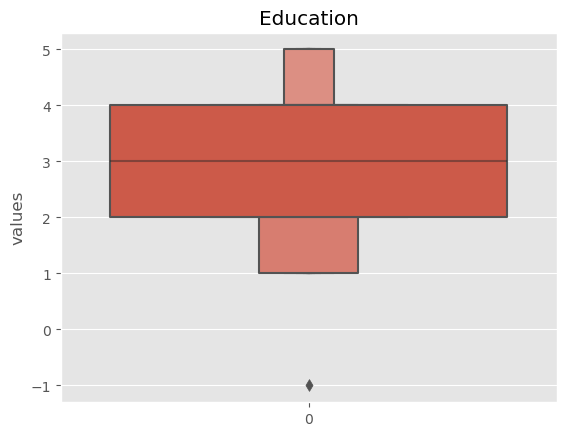

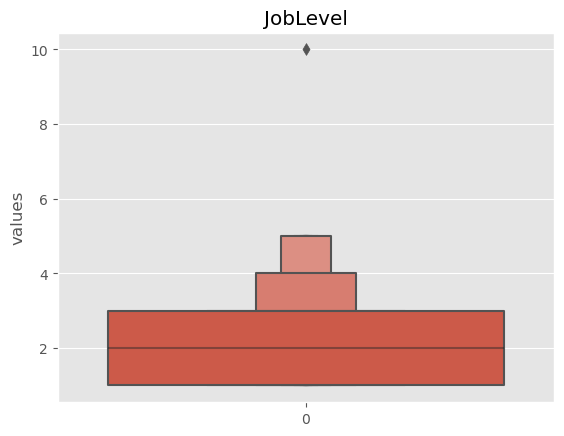

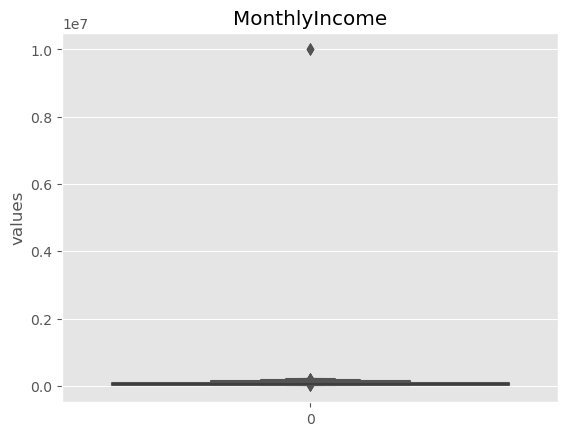

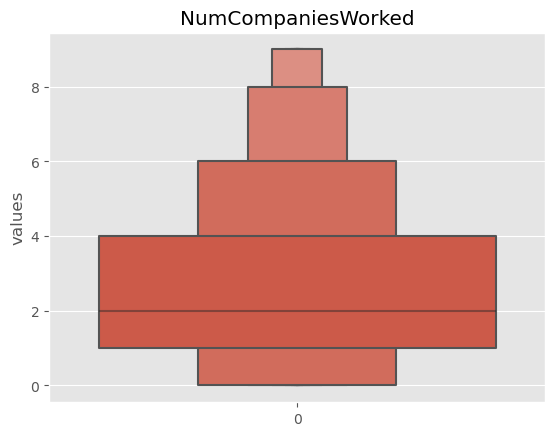

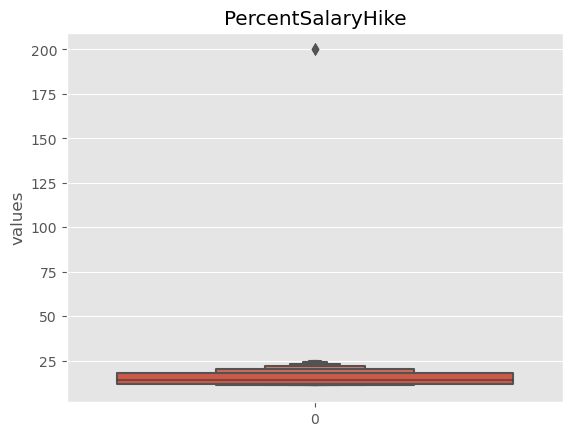

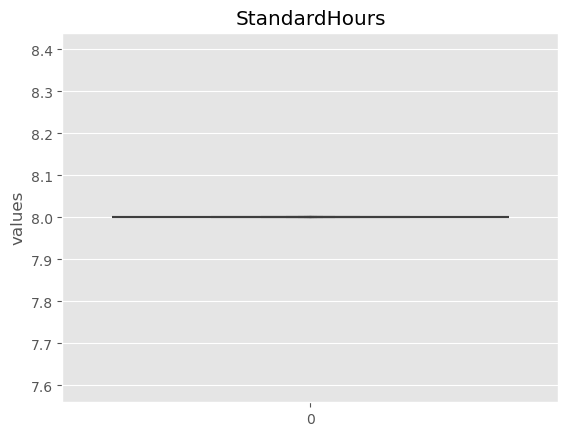

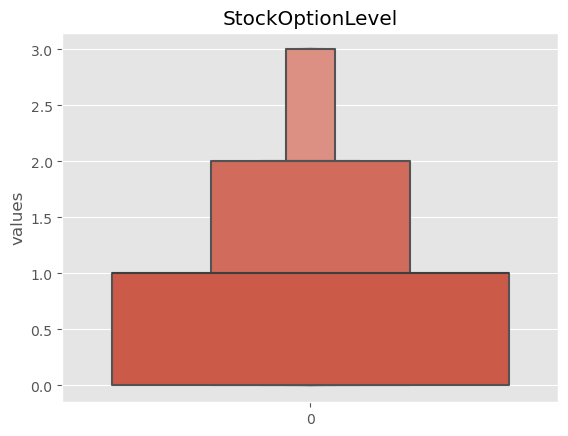

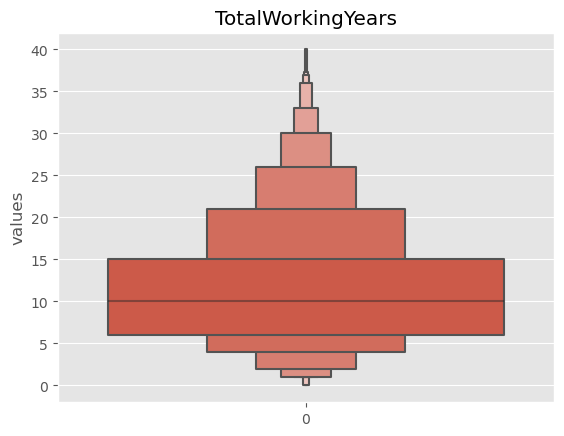

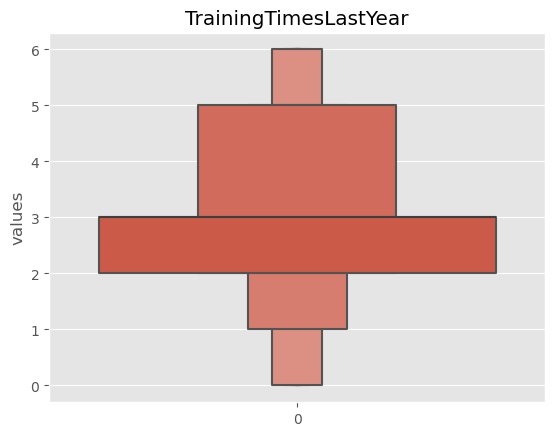

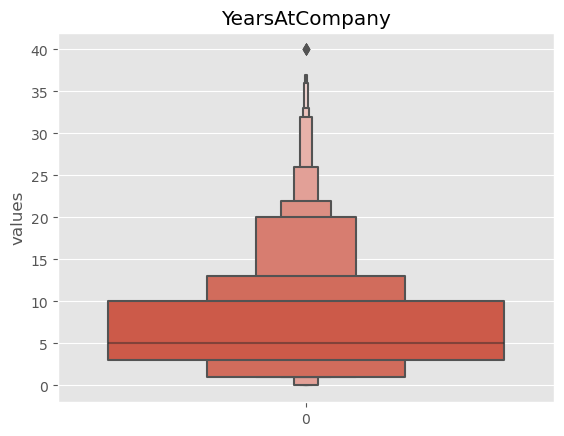

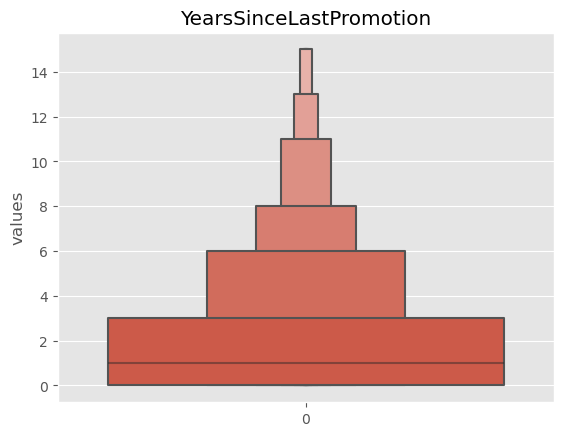

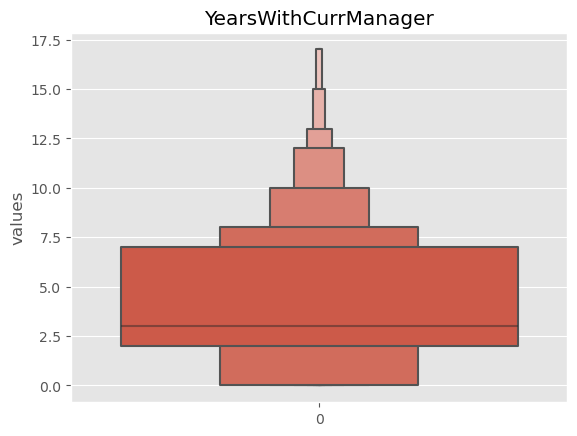

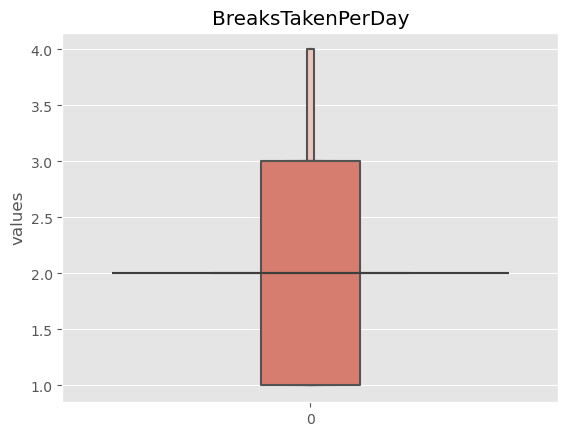

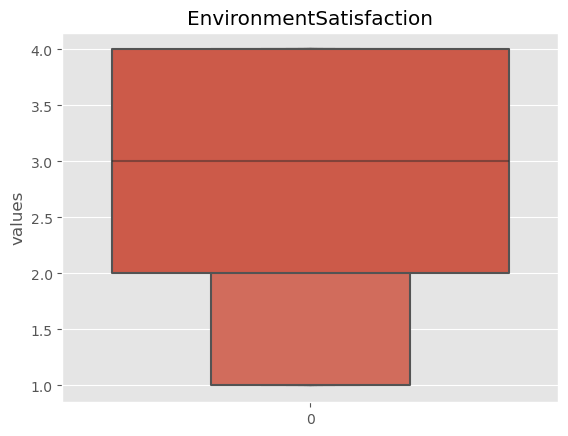

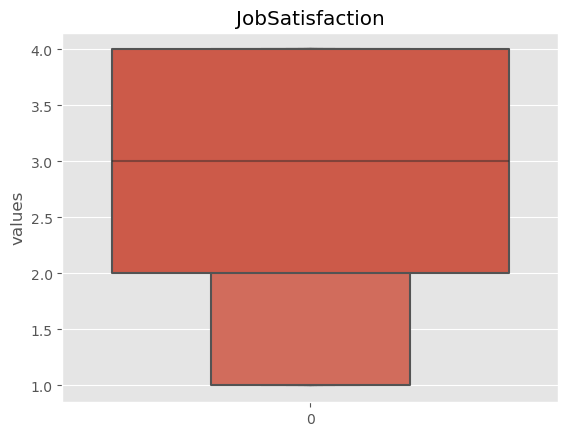

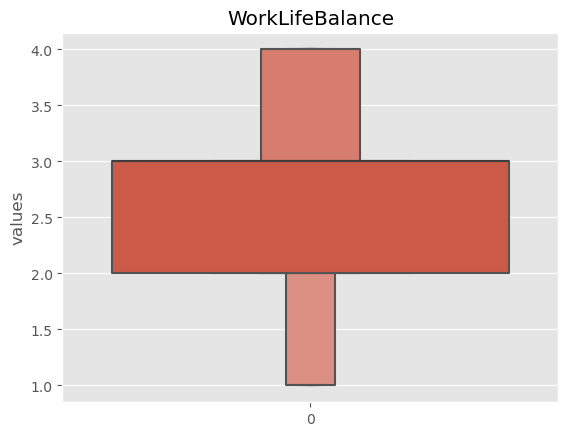

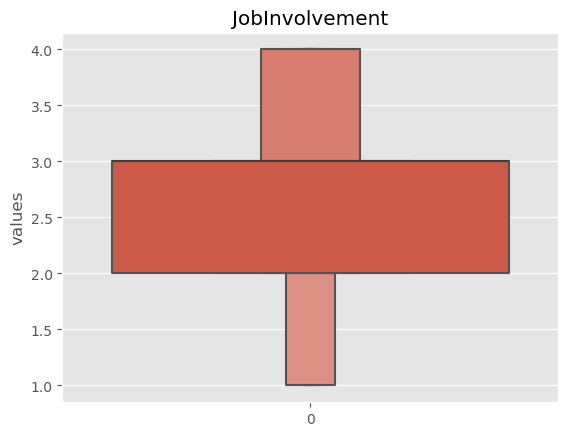

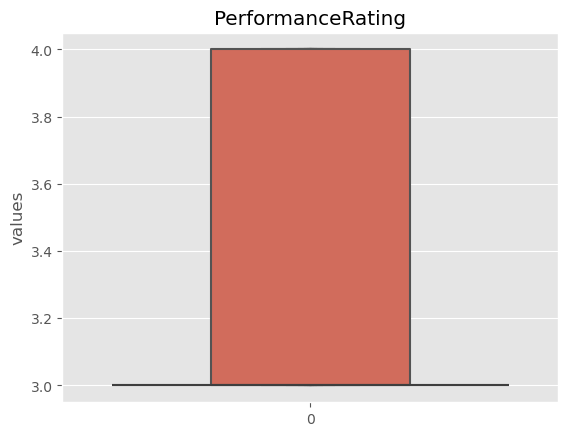

In [858]:
for i in df_num.columns:
    plt.style.use('ggplot')
    plt.title(i)
    plt.ylabel('values')
    sns.boxenplot(df[i])
    plt.show()

we have outliers in :
    1. age
    2. Distance from home
    3. education
    4. job level
    5. monthly income
    6. percent salary hike
    7. Years at company
and Standard hours is not displayed properly

In [859]:
# lets evaluate each of these

In [860]:
# Age column
df.Age.value_counts()

35     234
34     231
31     207
36     207
29     204
32     185
30     180
33     175
38     174
40     173
37     152
28     144
27     144
42     139
39     126
45     123
41     120
26     117
44      99
46      99
43      97
50      90
25      79
24      78
49      72
47      72
55      66
48      57
51      57
53      57
52      54
54      54
22      48
58      42
23      42
56      42
21      39
20      36
59      30
19      27
18      24
60      15
57      12
100      1
Name: Age, dtype: int64

In [861]:
# person with age 100 should not be there.

In [862]:
# we will treat every column at once

In [863]:
# Distance from home
df.DistanceFromHome.value_counts()

2      633
1      624
10     260
9      256
3      252
7      252
8      240
5      195
4      192
6      178
16      96
11      87
24      84
23      81
29      81
18      79
15      79
20      77
25      76
26      75
28      71
19      66
14      63
12      62
17      60
22      57
13      57
21      54
27      36
100      1
Name: DistanceFromHome, dtype: int64

In [864]:
# again the distance is the outlier

In [865]:
df.Education.value_counts()

 3    1722
 4    1195
 2     850
 1     512
 5     144
-1       1
Name: Education, dtype: int64

In [866]:
# Education level -1 is not possible

In [867]:
df.JobLevel.value_counts()

1     1633
2     1606
3      659
4      318
5      207
10       1
Name: JobLevel, dtype: int64

In [868]:
# job level of 10 is unrealistic for being an emloyee

In [869]:
df.MonthlyIncome.value_counts()

49080.0       16
23420.0       12
25590.0        9
55620.0        9
23800.0        9
              ..
134960.0       2
43450.0        2
54060.0        2
119570.0       2
10000000.0     2
Name: MonthlyIncome, Length: 1350, dtype: int64

In [870]:
# the highest salary is again an outlier as second highest is in lakhs and highesrt is in crores

In [871]:
df.PercentSalaryHike.value_counts()

11     633
13     627
14     606
12     599
15     303
18     267
17     246
16     234
19     228
22     168
20     166
21     144
23      84
24      63
25      54
200      2
Name: PercentSalaryHike, dtype: int64

In [872]:
# 200% salary hike is pos[sible so we shall not treat this column.

In [873]:
df.YearsAtCompany.value_counts()

5     589
1     514
3     384
2     381
10    361
4     331
7     270
9     247
8     240
6     228
0     132
11     96
20     81
13     72
15     60
14     54
21     49
22     45
12     42
18     40
16     36
19     33
17     27
24     18
33     15
25     13
26     12
31      9
32      9
29      6
27      6
36      6
23      6
34      3
30      3
37      3
40      3
Name: YearsAtCompany, dtype: int64

In [874]:
# 40 years at company is possible so we will not treat this column.

In [875]:
df.StandardHours.value_counts()

8    4424
Name: StandardHours, dtype: int64

In [876]:
# so, standard hours for every employee is 8 hours.
# we qill drop this column
df.drop(columns= 'StandardHours', inplace= True)

In [877]:
# we have age columns and above 18 column 
# we dont require over 18 column as it can be calculated by age column

In [878]:
df.drop(columns= 'Over18', inplace= True)

In [879]:
# since 1 or 2 rows are outliers in what we have seen out of the total rows.
# so, we will use the percentile method for outlier treatment

In [880]:
df.shape

(4424, 525)

In [881]:
2/4424*100

0.045207956600361664

In [882]:
# we will use lower cutoff as 0.0005 percentile 
# and upper cutoff as 99.9995 percentile

In [883]:
col_names = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome']

In [884]:
for i in col_names:
    df[i] = outlier_treatment(i)

In [885]:
df[df.columns.difference(col_names)].isna().sum()

1/13/2015_x                268
1/13/2015_y                268
1/15/2015_x                238
1/15/2015_y                238
1/16/2015_x                266
                          ... 
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Length: 520, dtype: int64

In [886]:
# every column is now treated

4. Apply any variable transformations, calculation that you deem necessary after looking at the data  (5 Marks)

In [887]:
df.Gender.value_counts()

Male      2635
Female    1751
M           21
F           17
Name: Gender, dtype: int64

In [888]:
df.Gender = np.where(df.Gender == 'Female','F',np.where(df.Gender == 'Male', 'M', np.where(df.Gender == 'F', 'F', 'M')))

In [889]:
df.Gender.value_counts()

M    2656
F    1768
Name: Gender, dtype: int64

In [890]:
# we can only encode the data/cols once we finish the eda
# since, our last task is to generate insights and perform eda. we will not encode the columns.

# Exploratory Data Analysis

Task-2: Exploratory data analysis ( conduct relevant analysis to try and answer the below questions ) (Weightage: 55%):

1. For all numeric variables, check if they follow a normal distribution. If some are not normal , will you treat them ? If yes - why and how ? If no - why not ? (5 Marks)

2. What is the annual attrition rate of the company overall and when you slice the data on different dimensions? Does any particular segment stand out (why)? (8 Marks)

3. What all factors impact attrition the most (statistical analysis expected) ? Are there any early signs which can help us be more proactive ? (E.g. Satisfaction dropping, Last rating not good) (8 Marks)

4. How are the employee job satisfaction scores overall and when you slice data by different dimensions ? Does any particular segment stand out (why) ? (8 Marks)

5. What all factors impact job satisfaction the most (statistical analysis expected) ? Is there any overlap with factors impacting attrition ? (8 Marks)

6. When we look at factors impacting attrition , is there any inter-relationship between the top factors ? If yes how did you identify this ? (8 Marks)

7. The HR Head has a opinion that people who have changed a lot of jobs in past are the ones with very high attrition and should be the biggest focus of retention program. How will you test this hypothesis ? (5 Marks)

8. Create at least any two analysis with proper visualization (5 Marks)

1. For all numeric variables, check if they follow a normal distribution. If some are not normal , will you treat them ? If yes - why and how ? If no - why not ? (5 Marks)

In [891]:
df_num = df.select_dtypes(include= 'number')

In [892]:
df_cat = df.select_dtypes(include= 'object')

<Figure size 800x500 with 0 Axes>

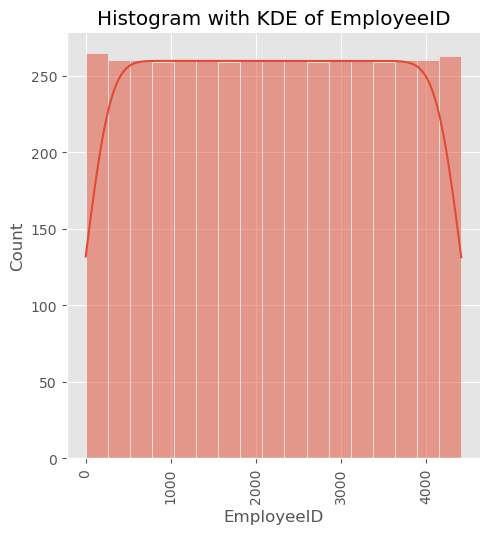

Skewness of EmployeeID: 0.0007131984714356662


<Figure size 800x500 with 0 Axes>

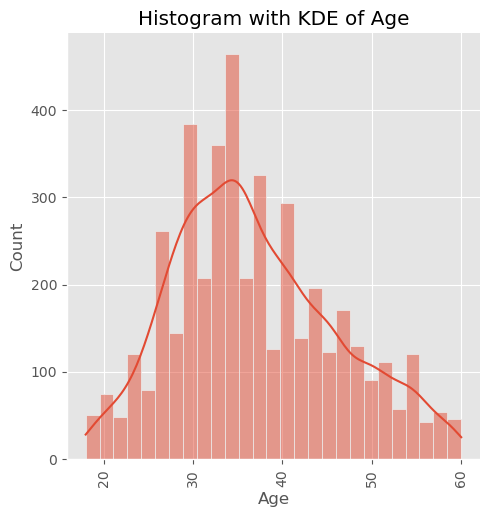

Skewness of Age: 0.41223415436417465


<Figure size 800x500 with 0 Axes>

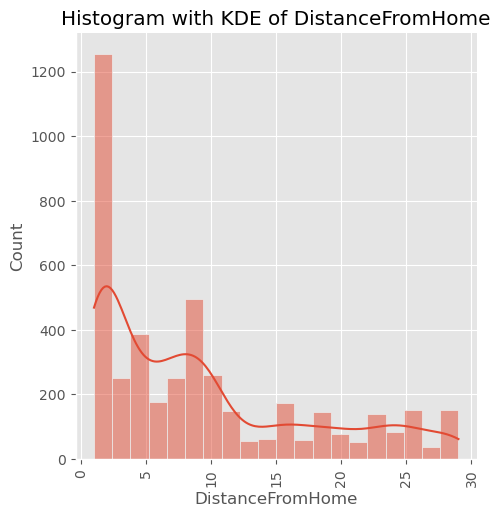

Skewness of DistanceFromHome: 0.9527483753934776


<Figure size 800x500 with 0 Axes>

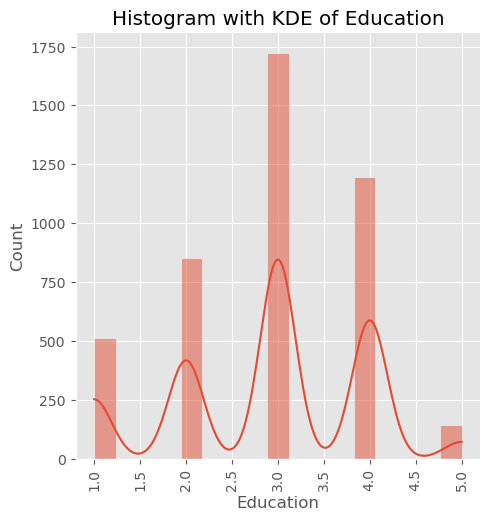

Skewness of Education: -0.2880285747957108


<Figure size 800x500 with 0 Axes>

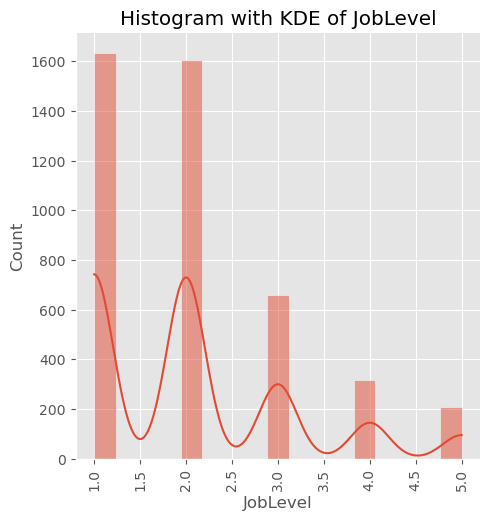

Skewness of JobLevel: 1.0231992681307276


<Figure size 800x500 with 0 Axes>

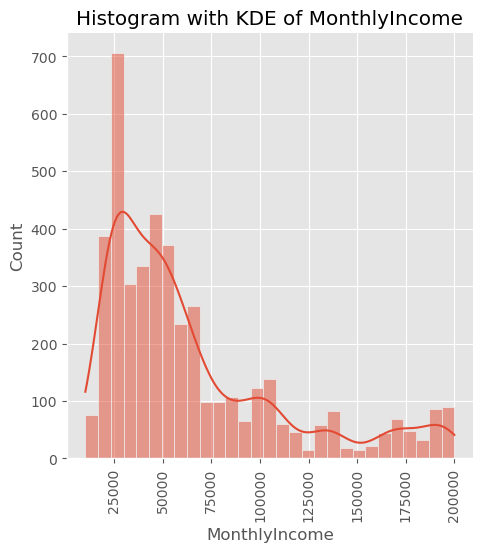

Skewness of MonthlyIncome: 1.3761158904093738


<Figure size 800x500 with 0 Axes>

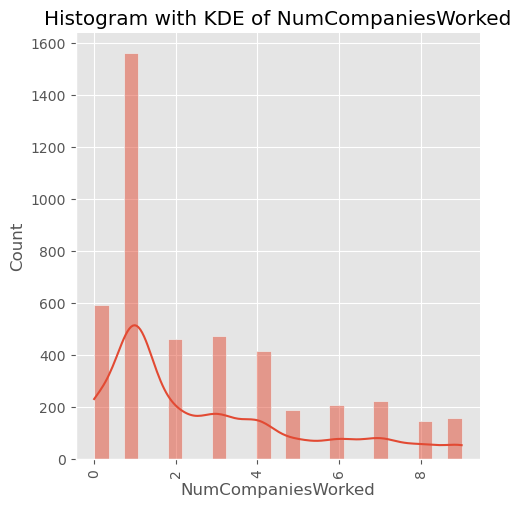

Skewness of NumCompaniesWorked: 1.0338813558105757


<Figure size 800x500 with 0 Axes>

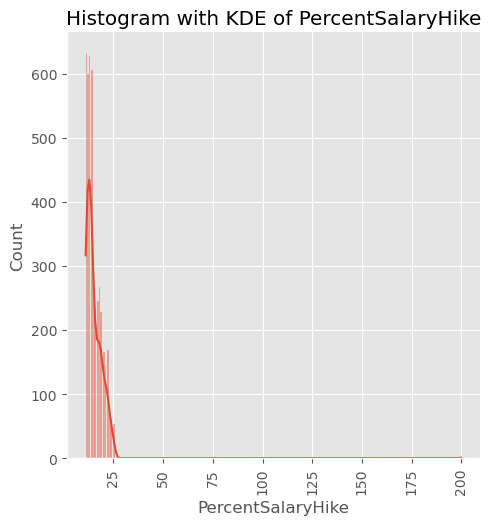

Skewness of PercentSalaryHike: 18.667828353014748


<Figure size 800x500 with 0 Axes>

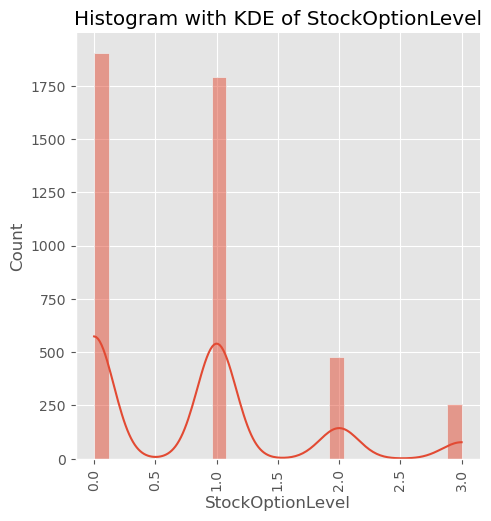

Skewness of StockOptionLevel: 0.969647189207807


<Figure size 800x500 with 0 Axes>

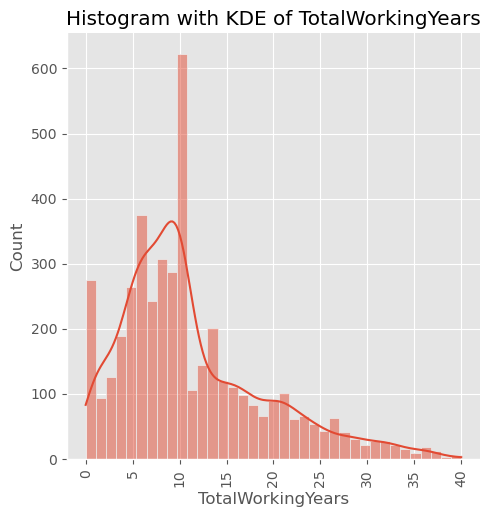

Skewness of TotalWorkingYears: 1.118970485161821


<Figure size 800x500 with 0 Axes>

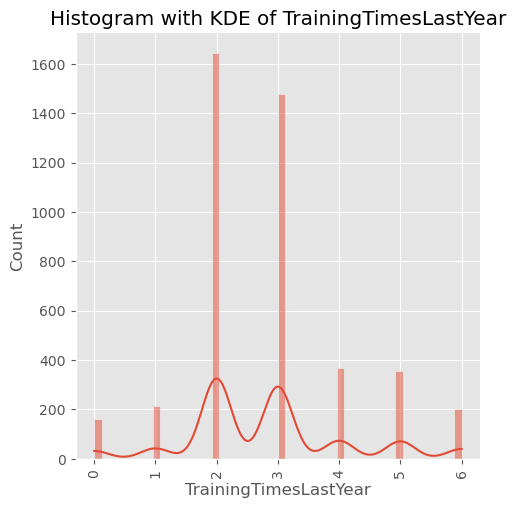

Skewness of TrainingTimesLastYear: 0.5572026637888818


<Figure size 800x500 with 0 Axes>

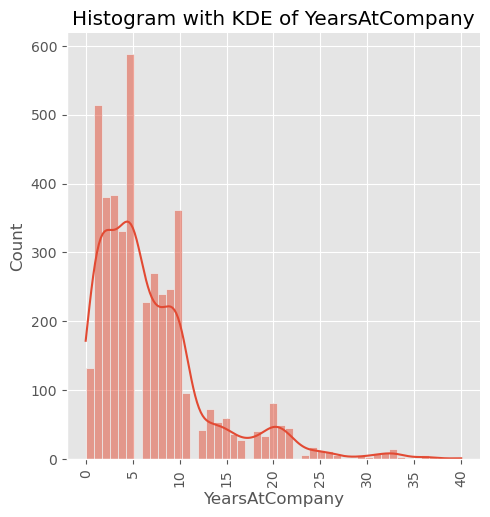

Skewness of YearsAtCompany: 1.7479946969007423


<Figure size 800x500 with 0 Axes>

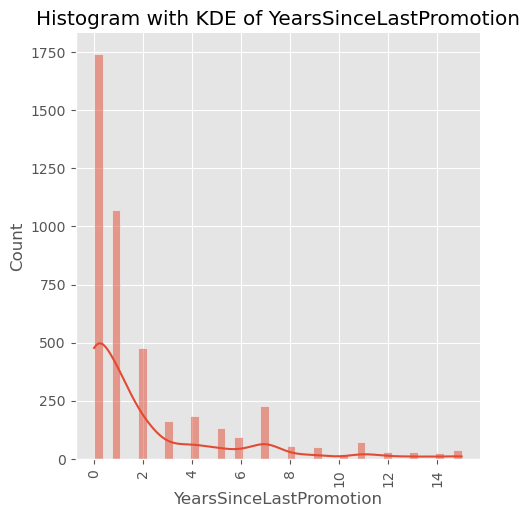

Skewness of YearsSinceLastPromotion: 1.978128659703683


<Figure size 800x500 with 0 Axes>

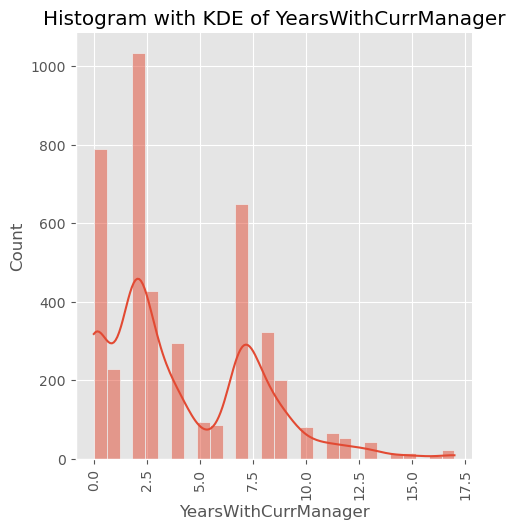

Skewness of YearsWithCurrManager: 0.8306580695028435


<Figure size 800x500 with 0 Axes>

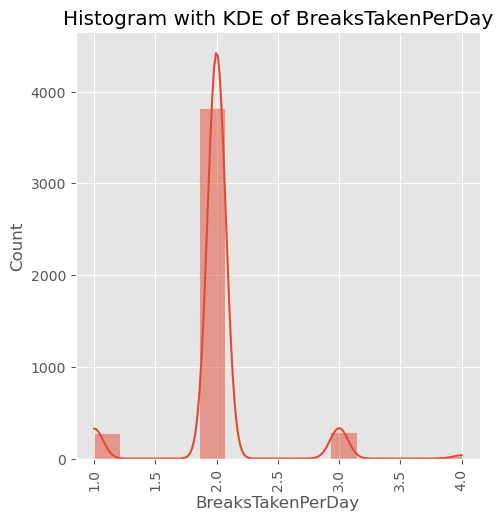

Skewness of BreaksTakenPerDay: 0.8095136063039489


<Figure size 800x500 with 0 Axes>

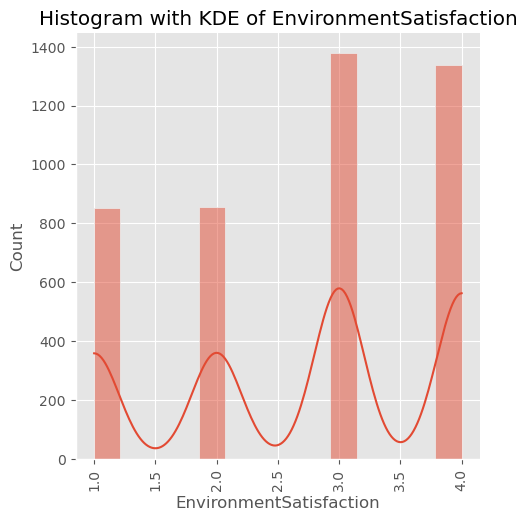

Skewness of EnvironmentSatisfaction: -0.3270723822975034


<Figure size 800x500 with 0 Axes>

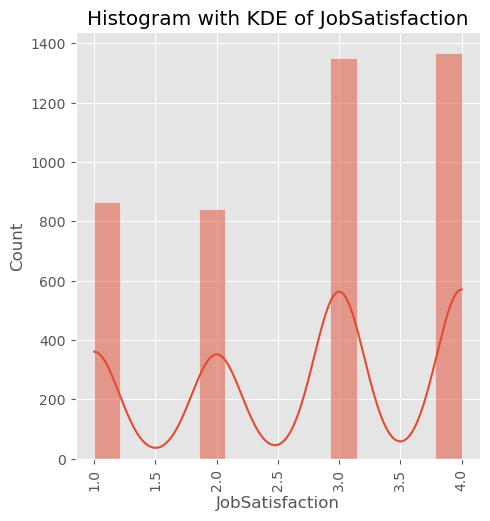

Skewness of JobSatisfaction: -0.33088088461843873


<Figure size 800x500 with 0 Axes>

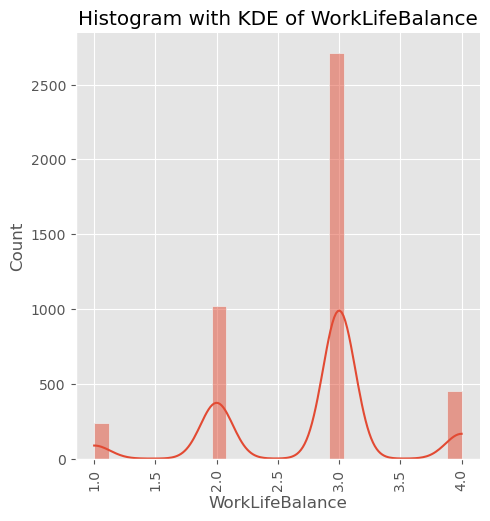

Skewness of WorkLifeBalance: -0.5687964415843029


<Figure size 800x500 with 0 Axes>

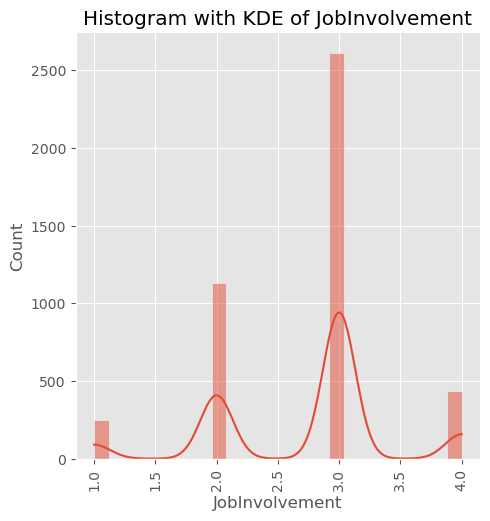

Skewness of JobInvolvement: -0.49586749025707855


<Figure size 800x500 with 0 Axes>

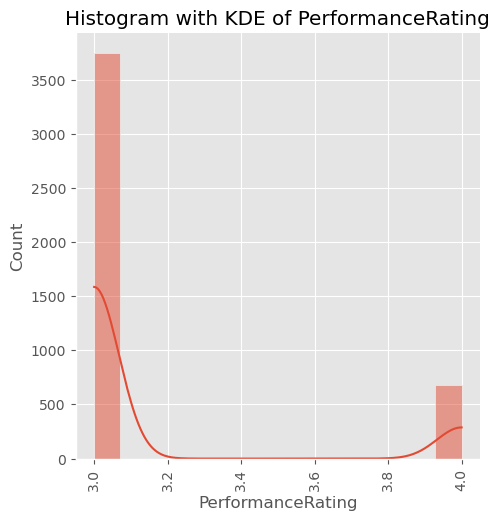

Skewness of PerformanceRating: 1.920288073327828


In [893]:
for i in df_num.columns:
    plt.figure(figsize=(8, 5))
    sns.displot(df_num[i], kde=True)
    plt.title(f'Histogram with KDE of {i}')
    plt.xticks(rotation = 90)
    plt.show()

    skewness = stats.skew(df_num[i])
    print(f"Skewness of {i}: {skewness}")

In [894]:
# A column is normally distributed if it has skewness between -0.5 to 0.5
# 1. emp;oyee id is a integer but only kept in the table for differentiating the rows. we can ignone this
# 2. the age column is almost normal with skewness of 0.41
# 3. Distance from home column is not normal because more people prefer to stay close to office to save time travelling to office
# but those who stay in same city will prefer to stay at home and travel from a long distance. 
# 4. education column is also normally distributed.
# 5. Joblevel is not normally distributed because there is a decrease in jons at higher level.
# 6. There is a disparity in monthly salary since it is dependant on efficiency and job level.
# 7. NumCompanies worked is also not normal because in starting employees seitch more often between companies.
# 8. percent salary hike is also not normal because there is one employee who has 200% hike thats why it is right tailed.
# 9. This is also not normal because less prople are interested in ESOPs and they can prefer other investment options.
# 10. Total working hours are dependant on the projects. maybe company is getting less projects or maybe the employees are on leave.
# that is why it is not normally distributed
# 11. Training time is somewha9t normal meaning company is giving uniform treatment.
# 12. Years at c0ompany is also not normal because people switch ofen in early stage of career.
# 13. Years with current manage is not normal as employees switch in between.
# 14. Performance rating is based on efficiency so this is also not normal.
# 15. Breaks taken in day is not normal because some employees are taking 4 breaks in a day.
# 16. Job saltisfaction, worklife balance, jo involvement, job satisfaction and environment are normally distributed.

2. What is the annual attrition rate of the company overall and when you slice the data on different dimensions? Does any particular segment stand out (why)? (8 Marks)


In [895]:
df1 = df.Attrition_Date

In [896]:
df1.dropna(inplace= True)

In [897]:
df1 = df1.dt.year

In [898]:
df1 = pd.DataFrame(df1)

In [899]:
df1.head()

,Attrition_Date
1,2015
6,2015
13,2015
28,2015
30,2015


In [900]:
df1.groupby('Attrition_Date')['Attrition_Date'].count()

Attrition_Date
2015    712
Name: Attrition_Date, dtype: int64

In [901]:
# 712 employees are leaving per annum 

In [902]:
df.shape[0]

4424

In [903]:
print(f"attriotn rate is {712/4424*100}%")

attriotn rate is 16.09403254972875%


In [904]:
# Total atrrition genderwise
df.groupby('Gender')['Attrition_Date'].count() / 4424 * 100

Gender
F    6.125678
M    9.968354
Name: Attrition_Date, dtype: float64

In [905]:
# Total atrrition by job saisfaction
df.groupby('JobSatisfaction')['Attrition_Date'].count() / 4424 * 100

JobSatisfaction
1.0    4.475588
2.0    3.119349
3.0    4.972875
4.0    3.526221
Name: Attrition_Date, dtype: float64

In [906]:
# Total atrrition by job WorkLifeBalance
df.groupby('WorkLifeBalance')['Attrition_Date'].count() / 4424 * 100

WorkLifeBalance
1.0    1.695298
2.0    3.865280
3.0    8.702532
4.0    1.830922
Name: Attrition_Date, dtype: float64

In [907]:
# Total atrrition by job JobLevel
df.groupby('JobLevel')['Attrition_Date'].count() / 4424 * 1000

JobLevel
1    57.188065
2    64.421338
3    21.699819
4    11.528029
5     6.103074
Name: Attrition_Date, dtype: float64

In [908]:
# Total atrrition by job EducationField
df.groupby('EducationField')['Attrition_Date'].count() / 4424 * 100

EducationField
Human Resources     0.745931
Life Sciences       6.849005
Marketing           1.695298
Medical             5.108499
Other               0.678119
Technical Degree    1.017179
Name: Attrition_Date, dtype: float64

In [909]:
# Total atrrition by job EnvironmentSatisfaction
df.groupby('EnvironmentSatisfaction')['Attrition_Date'].count() / 4424 * 100

EnvironmentSatisfaction
1.0    4.837251
2.0    2.893309
3.0    4.317360
4.0    4.046112
Name: Attrition_Date, dtype: float64

In [910]:
# Total atrrition by job JobInvolvement
df.groupby('JobInvolvement')['Attrition_Date'].count() / 4424 * 100

JobInvolvement
1.0    1.220615
2.0    4.068716
3.0    9.041591
4.0    1.763110
Name: Attrition_Date, dtype: float64

In [911]:
# Total atrrition by job PerformanceRating
df.groupby('PerformanceRating')['Attrition_Date'].count() / 4424 * 100

PerformanceRating
3.0    13.313743
4.0     2.780289
Name: Attrition_Date, dtype: float64

In [912]:
# the employees with low performance rating are likely to leave the company

3. What all factors impact attrition the most (statistical analysis expected) ? Are there any early signs which can help us be more proactive ? (E.g. Satisfaction dropping, Last rating not good) (8 Marks)

In [913]:
# Creating a new column for attrition in different dataframe

In [914]:
df1 = df

In [915]:
df1 = df[~(df.Attrition_Date.isna())]

In [916]:
df1['Attrition']=1

C:\Users\pauld\AppData\Local\Temp\ipykernel_12308\316879758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Attrition']=1


In [917]:
df1 = df1[['EmployeeID', 'Attrition']]

In [918]:
df1= pd.merge(left = df, right= df1, on = 'EmployeeID', how = 'left')

In [919]:
df1.head()

,EmployeeID,Age,Attrition_Date,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,12/18/2015_y,12/21/2015_y,12/22/2015_y,12/23/2015_y,12/24/2015_y,12/28/2015_y,12/29/2015_y,12/30/2015_y,12/31/2015_y,Attrition
0,1,51,NaT,Travel_Rarely,Sales,6,2,Life Sciences,F,1,...,NaT,2015-12-21 17:15:00,2015-12-22 17:27:00,2015-12-23 16:44:00,2015-12-24 17:47:00,2015-12-28 18:00:00,2015-12-29 17:22:00,2015-12-30 17:40:00,2015-12-31 17:17:00,NaN
1,2,31,2015-12-13,Travel_Frequently,R&D,10,1,Life Sciences,F,1,...,2015-12-18 18:31:00,2015-12-21 17:34:00,2015-12-22 18:16:00,2015-12-23 17:38:00,NaT,2015-12-28 17:08:00,2015-12-29 17:54:00,2015-12-30 18:31:00,2015-12-31 17:40:00,1.0
2,3,32,NaT,Travel_Frequently,R&D,17,4,Other,M,4,...,2015-12-18 17:02:00,2015-12-21 17:20:00,2015-12-22 16:32:00,2015-12-23 16:59:00,2015-12-24 16:58:00,2015-12-28 16:43:00,2015-12-29 17:09:00,2015-12-30 17:06:00,2015-12-31 17:15:00,NaN
3,4,38,NaT,Non-Travel,R&D,2,5,Life Sciences,M,3,...,2015-12-18 17:55:00,2015-12-21 16:49:00,2015-12-22 17:24:00,2015-12-23 17:36:00,2015-12-24 16:48:00,2015-12-28 17:19:00,2015-12-29 16:58:00,2015-12-30 17:40:00,2015-12-31 17:09:00,NaN
4,5,32,NaT,Travel_Rarely,Research & Development,10,1,Medical,M,1,...,2015-12-18 17:52:00,2015-12-21 17:43:00,2015-12-22 18:07:00,2015-12-23 18:00:00,2015-12-24 17:59:00,2015-12-28 17:44:00,2015-12-29 18:47:00,2015-12-30 17:15:00,2015-12-31 17:42:00,NaN


In [920]:
df1['Attrition'] = df1['Attrition'].fillna(0)

In [921]:
df1.drop(columns= 'Attrition_Date', inplace= True)

In [922]:
df1.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,12/18/2015_y,12/21/2015_y,12/22/2015_y,12/23/2015_y,12/24/2015_y,12/28/2015_y,12/29/2015_y,12/30/2015_y,12/31/2015_y,Attrition
0,1,51,Travel_Rarely,Sales,6,2,Life Sciences,F,1,Healthcare Representative,...,NaT,2015-12-21 17:15:00,2015-12-22 17:27:00,2015-12-23 16:44:00,2015-12-24 17:47:00,2015-12-28 18:00:00,2015-12-29 17:22:00,2015-12-30 17:40:00,2015-12-31 17:17:00,0.0
1,2,31,Travel_Frequently,R&D,10,1,Life Sciences,F,1,Research Scientist,...,2015-12-18 18:31:00,2015-12-21 17:34:00,2015-12-22 18:16:00,2015-12-23 17:38:00,NaT,2015-12-28 17:08:00,2015-12-29 17:54:00,2015-12-30 18:31:00,2015-12-31 17:40:00,1.0
2,3,32,Travel_Frequently,R&D,17,4,Other,M,4,Sales Executive,...,2015-12-18 17:02:00,2015-12-21 17:20:00,2015-12-22 16:32:00,2015-12-23 16:59:00,2015-12-24 16:58:00,2015-12-28 16:43:00,2015-12-29 17:09:00,2015-12-30 17:06:00,2015-12-31 17:15:00,0.0
3,4,38,Non-Travel,R&D,2,5,Life Sciences,M,3,Human Resources,...,2015-12-18 17:55:00,2015-12-21 16:49:00,2015-12-22 17:24:00,2015-12-23 17:36:00,2015-12-24 16:48:00,2015-12-28 17:19:00,2015-12-29 16:58:00,2015-12-30 17:40:00,2015-12-31 17:09:00,0.0
4,5,32,Travel_Rarely,Research & Development,10,1,Medical,M,1,Sales Executive,...,2015-12-18 17:52:00,2015-12-21 17:43:00,2015-12-22 18:07:00,2015-12-23 18:00:00,2015-12-24 17:59:00,2015-12-28 17:44:00,2015-12-29 18:47:00,2015-12-30 17:15:00,2015-12-31 17:42:00,0.0


In [923]:
df1_cat = df1.select_dtypes(include= 'object')
df1_num = df1.select_dtypes(include= 'number')
df1_cat = pd.get_dummies(df1_cat, drop_first= True, dtype= int)

In [924]:
df1_num.drop(columns='EmployeeID', inplace= True)

In [925]:
df1 = pd.concat([df1_num,df1_cat], axis= 1)

In [926]:
df1.corr().Attrition.sort_values(ascending = False)

Attrition                              1.000000
MaritalStatus_Single                   0.177705
BusinessTravel_Travel_Frequently       0.120594
Department_Human Resources             0.078339
JobRole_Research Director              0.049592
Department_Research and Development    0.042279
NumCompaniesWorked                     0.041510
JobRole_Research Scientist             0.027003
PerformanceRating                      0.022660
Gender_M                               0.015718
PercentSalaryHike                      0.014488
EducationField_Life Sciences           0.011733
JobRole_Sales Executive                0.009250
JobRole_Laboratory Technician          0.004063
EducationField_Medical                 0.002630
BusinessTravel_Rarely                  0.000929
BusinessTravel_Frequently             -0.004481
EducationField_Marketing              -0.004807
BreaksTakenPerDay                     -0.005916
StockOptionLevel                      -0.007637
Department_R&D                        -0

In [927]:
# Marital status single has the highest strength

4. How are the employee job satisfaction scores overall and when you slice data by different dimensions ? Does any particular segment stand out (why) ? (8 Marks)

In [928]:
col_names = ['Age', 'Attrition_Date', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
              'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BreaksTakenPerDay',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome']

In [929]:
for i in col_names:
    counts_by_satisfaction = df.groupby('JobSatisfaction')[i].value_counts().unstack().fillna(0)
    print(f"Counts for {i} by JobSatisfaction:\n{counts_by_satisfaction}\n")

Counts for Age by JobSatisfaction:
Age                18   19    20    21    22    23    24    25    26    27  \
JobSatisfaction                                                              
1.0               0.0  6.0  10.0   6.0   6.0  15.0   9.0  18.0  26.0  30.0   
2.0               3.0  9.0   3.0  12.0   9.0   3.0  18.0  12.0  15.0  36.0   
3.0              12.0  3.0  14.0   9.0  15.0  15.0  33.0  25.0  35.0  40.0   
4.0               9.0  9.0   9.0  12.0  18.0   9.0  18.0  24.0  41.0  38.0   

Age              ...    51    52    53    54    55    56   57    58    59   60  
JobSatisfaction  ...                                                            
1.0              ...   3.0   9.0   9.0  12.0  11.0  15.0  0.0   6.0   6.0  9.0  
2.0              ...  21.0   9.0   6.0   3.0  21.0   9.0  0.0  12.0   0.0  0.0  
3.0              ...  18.0  15.0  21.0  24.0  13.0   9.0  6.0  15.0   6.0  1.0  
4.0              ...  15.0  21.0  21.0  15.0  21.0   9.0  6.0   9.0  18.0  6.0  

[4 rows x

In [930]:
# Distance from home affects the job satisfaction
# more the distance less is the job satisfaction

5. What all factors impact job satisfaction the most (statistical analysis expected) ? Is there any overlap with factors impacting attrition ? (8 Marks)

In [931]:
# using correlation

df.corr().JobSatisfaction.sort_values(ascending= False)

C:\Users\pauld\AppData\Local\Temp\ipykernel_12308\446164906.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().JobSatisfaction.sort_values(ascending= False)


JobSatisfaction            1.000000
PerformanceRating          0.043967
StockOptionLevel           0.039673
PercentSalaryHike          0.025510
JobInvolvement             0.004933
MonthlyIncome              0.003777
EmployeeID                 0.000282
Age                       -0.002714
YearsAtCompany            -0.003322
Education                 -0.003609
EnvironmentSatisfaction   -0.007087
DistanceFromHome          -0.011648
TotalWorkingYears         -0.017234
JobLevel                  -0.017696
WorkLifeBalance           -0.018274
YearsSinceLastPromotion   -0.018300
TrainingTimesLastYear     -0.021226
BreaksTakenPerDay         -0.023812
YearsWithCurrManager      -0.026574
NumCompaniesWorked        -0.054884
Name: JobSatisfaction, dtype: float64

In [932]:
# Performance rating affects job satisfaction

6. When we look at factors impacting attrition , is there any inter-relationship between the top factors ? If yes how did you identify this ? (8 Marks)

In [933]:
df1.columns

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BreaksTakenPerDay',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition',
       'BusinessTravel_Frequently', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Rarely', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_R&D', 'Department_Research & Development',
       'Department_Research and Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_M',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician'

In [934]:
X = df1.drop(columns='Attrition')
y = df1['Attrition']

In [935]:
# adding constant term to dependant variable
X_with_constant =sm.add_constant(X)
vif_table=pd.DataFrame()
vif_table['Features'] = X_with_constant.columns
vif_table['VIF']= [variance_inflation_factor(X_with_constant,i) for i in range (X_with_constant.shape[1])]
vif_table

,Features,VIF
0,const,1011.584430
1,Age,2.033647
2,DistanceFromHome,1.021642
3,Education,1.026852
4,JobLevel,1.030754
5,MonthlyIncome,1.036530
6,NumCompaniesWorked,1.266098
7,PercentSalaryHike,1.651776
8,StockOptionLevel,1.035481
9,TotalWorkingYears,3.093400


In [936]:
# Years with company, Total working years and age have a correlation. I have not considered the self made columns

7. The HR Head has a opinion that people who have changed a lot of jobs in past are the ones with very high attrition and should be the biggest focus of retention program. How will you test this hypothesis ? (5 Marks)

In [937]:
# Ho - people who have changed a lot of jobs in past are the ones with very high attrition 
# Ha - people who have not changed a lot of jobs in past are the ones with very high attrition 

In [938]:
df.NumCompaniesWorked.sum()

11891.0

In [940]:
df1['Attrition']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4421    0.0
4422    0.0
4423    0.0
4424    0.0
4425    0.0
Name: Attrition, Length: 4426, dtype: float64

In [942]:
t_stat, p_value = stats.pearsonr(df1['NumCompaniesWorked'],df1['Attrition'])
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 0.0415097138456865, p-value: 0.005745262018752969


In [943]:
# p-value is less than 0.05 so Ha goes and Ho is true.

8. Create at least any two analysis with proper visualization (5 Marks)

Text(0.5, 1.0, 'Attrition vs gender')

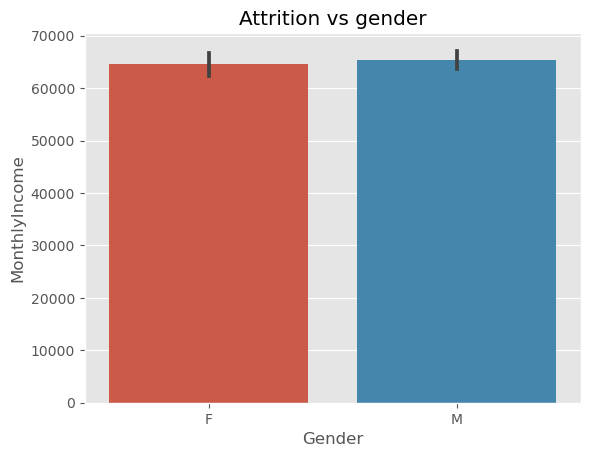

In [949]:
sns.barplot(x= df.Gender, y = df.MonthlyIncome)
plt.title('Attrition vs gender')

In [950]:
# monthly salary is almost equal for male and female

Text(0.5, 1.0, 'No, of companies worked vs Salary')

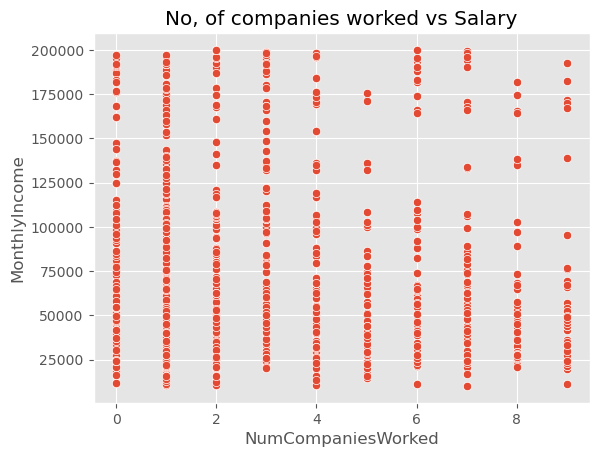

In [964]:
sns.scatterplot(y= df1.MonthlyIncome,x = df1.NumCompaniesWorked )
plt.title('No, of companies worked vs Salary')

In [965]:
# this means salary is not dependant on no. of companies worked

Task-3:Calculating the duration of working hours (Weightage: 10%):

1. Calculate the average time duration spent by each employee using In Time & Out Time (5 Marks)

2. Create Bins based on the average time duration into below bins (5 Marks)
a. High: If employee spent more than 8 Hours
b. Medium: if employee spent more than 6 Hours
c. Low: If employee spent less than 6 Hours

In [966]:
in_time.columns

Index([       'EmployeeID', 2015-02-01 00:00:00, 2015-05-01 00:00:00,
       2015-06-01 00:00:00, 2015-07-01 00:00:00, 2015-08-01 00:00:00,
       2015-09-01 00:00:00, 2015-12-01 00:00:00,         '1/13/2015',
               '1/15/2015',
       ...
              '12/17/2015',        '12/18/2015',        '12/21/2015',
              '12/22/2015',        '12/23/2015',        '12/24/2015',
              '12/28/2015',        '12/29/2015',        '12/30/2015',
              '12/31/2015'],
      dtype='object', length=250)

In [992]:
date_cols = df.select_dtypes(include= 'datetime')
date_cols = date_cols.columns

In [995]:
date_cols = date_cols.drop( 'Attrition_Date')

In [990]:
date_cols = pd.DataFrame(date_cols)

In [997]:
date_cols = date_cols[0:249]

In [1011]:
date_cols

Index(['2015-02-01 00:00:00_x', '2015-05-01 00:00:00_x',
       '2015-06-01 00:00:00_x', '2015-07-01 00:00:00_x',
       '2015-08-01 00:00:00_x', '2015-09-01 00:00:00_x',
       '2015-12-01 00:00:00_x', '1/13/2015_x', '1/15/2015_x', '1/16/2015_x',
       ...
       '12/17/2015_x', '12/18/2015_x', '12/21/2015_x', '12/22/2015_x',
       '12/23/2015_x', '12/24/2015_x', '12/28/2015_x', '12/29/2015_x',
       '12/30/2015_x', '12/31/2015_x'],
      dtype='object', length=249)

In [1022]:
for i in range(0, 250):
    df['duration_' + str(i)] = pd.to_datetime(df.iloc[:, i + 249], format='%m/%d/%Y', errors='coerce') - pd.to_datetime(df.iloc[:, i], format='%m/%d/%Y', errors='coerce')


In [1023]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition_Date', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       ...
       'duration_240', 'duration_241', 'duration_242', 'duration_243',
       'duration_244', 'duration_245', 'duration_246', 'duration_247',
       'duration_248', 'duration_249'],
      dtype='object', length=775)

In [1034]:
df['Total'] = df.iloc[:, 526:775].apply(pd.to_timedelta, errors='coerce').mean(axis=1)

In [1037]:
# average
df['Total']

0      0 days 07:22:18.373205741
1      0 days 05:47:54.905660377
2      0 days 07:00:35.779816513
3      0 days 07:11:32.440191387
4      0 days 08:00:29.863013698
                  ...           
4522   0 days 07:42:33.173076923
4523   0 days 09:29:43.888888888
4524   0 days 06:59:23.942307692
4525                         NaT
4526                         NaT
Name: Total, Length: 4424, dtype: timedelta64[ns]

2. Create Bins based on the average time duration into below bins (5 Marks)
a. High: If employee spent more than 8 Hours
b. Medium: if employee spent more than 6 Hours
c. Low: If employee spent less than 6 Hours

In [1038]:
df['DurationCategory'] = pd.cut(df['Total'].dt.total_seconds() / 3600,
                                bins=[-float('inf'), 6, 8, float('inf')],
                                labels=['Low', 'Medium', 'High'],
                                right=False)

In [1039]:
df.head()

,EmployeeID,Age,Attrition_Date,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,duration_242,duration_243,duration_244,duration_245,duration_246,duration_247,duration_248,duration_249,Total,DurationCategory
0,1,51,NaT,Travel_Rarely,Sales,6,2,Life Sciences,F,1,...,0 days 07:20:00,0 days 07:47:00,0 days 07:06:00,0 days 07:25:00,0 days 07:00:00,0 days 07:49:00,0 days 07:19:00,0 days 07:35:00,0 days 07:22:18.373205741,Medium
1,2,31,2015-12-13,Travel_Frequently,R&D,10,1,Life Sciences,F,1,...,0 days 08:12:00,0 days 08:15:00,0 days 08:00:00,0 days 07:56:00,NaT,0 days 07:51:00,0 days 07:41:00,0 days 07:42:00,0 days 05:47:54.905660377,Low
2,3,32,NaT,Travel_Frequently,R&D,17,4,Other,M,4,...,0 days 07:00:00,0 days 06:49:00,0 days 07:18:00,0 days 07:16:00,0 days 06:12:00,0 days 07:34:00,0 days 06:56:00,0 days 06:40:00,0 days 07:00:35.779816513,Medium
3,4,38,NaT,Non-Travel,R&D,2,5,Life Sciences,M,3,...,0 days 06:44:00,0 days 07:01:00,0 days 06:36:00,0 days 07:17:00,0 days 07:36:00,0 days 07:32:00,0 days 07:08:00,0 days 07:49:00,0 days 07:11:32.440191387,Medium
4,5,32,NaT,Travel_Rarely,Research & Development,10,1,Medical,M,1,...,0 days 07:52:00,0 days 07:58:00,0 days 07:54:00,0 days 07:57:00,0 days 07:36:00,0 days 08:34:00,0 days 08:26:00,0 days 08:32:00,0 days 08:00:29.863013698,High


In [1040]:
# Categories are made

In [1041]:
# END